# <font color='blue'>Project - NLP: Sentiment Analysis : Twitter US Airline Sentiment</font>



**Data Description:** 


A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service"). 

**Dataset** 


The project is from a dataset from Kaggle.  
Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment  
The dataset has to be downloaded from the above Kaggle website. 


The dataset has the following columns: 

*	tweet_id
*	airline_sentiment
*	airline_sentiment_confidence
*	negativereason 
*	negativereason_confidence 
*	airline 
*	airline_sentiment_gold 
*	name 
*	negativereason_gold 
*	retweet_count 
*	text 
*	tweet_coord 
*	tweet_created 
*	tweet_location 
*	user_timezone

**Objective:** 


To implement the techniques learnt as a part of the course. 

**Learning Outcomes:**


*	Basic understanding of text pre-processing. 
*	What to do after text pre-processing:  
*		Bag of words 
*		Tf-idf 
*	Build the classification model. 
*	Evaluate the Model.

# <font color='blue'>Step 1</font>

**Import the libraries, load dataset, print shape of data, data description**

**Import the libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re, string, unicodedata
from bs4 import BeautifulSoup

!pip install contractions
import nltk
import contractions

nltk.download('wordnet')
nltk.download('punkt')

from nltk.tokenize import word_tokenize 
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from mlxtend.plotting import plot_confusion_matrix

from imblearn.over_sampling import SMOTE


     |████████████████████████████████| 245kB 8.8MB/s 
     |████████████████████████████████| 317kB 11.6MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81706 sha256=436dcd4f085d260ac20aa4ca53ffb3df8534a93dcd9a0be2e44fcf0e639c415a
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#from google.colab import drive
#drive.mount('/content/drive/')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Load dataset**

In [22]:
from google.colab import files 
  
  
uploaded = files.upload()

Saving Tweets.csv to Tweets.csv


In [27]:
# Load the dataset
tweet_data = pd.read_csv('Tweets.csv',header=0)

In [28]:
tweet_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


**Shape of data**

In [29]:
# There are 14640 rows and 15 columns in the tweet data
print(tweet_data.shape)

(14640, 15)


In [30]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [31]:
tweet_data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

**Checking if data is duplicated and removing duplicates**

In [32]:
# Check for duplicate rows
duplicateRowsDF = tweet_data[tweet_data.duplicated()]
print(duplicateRowsDF.head())
print(duplicateRowsDF.shape)  
# There are 36 duplicate rows

                 tweet_id  ...                user_timezone
12040  570308309682675712  ...                        Quito
12059  570305051819941889  ...                        Quito
12063  570303383782989824  ...  Mountain Time (US & Canada)
12066  570301929580048385  ...       Atlantic Time (Canada)
12068  570301395141836801  ...   Central Time (US & Canada)

[5 rows x 15 columns]
(36, 15)


In [33]:
# Drop the duplicate rows
tweet_data.drop_duplicates(keep=False,inplace=True) 

In [34]:
# There are 14568 rows and 15 columns after dropping 36 duplicate rows from the initial load dataset
print(tweet_data.shape)

(14568, 15)


**Description of Data**

In [35]:
tweet_data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.456800e+04,14568.000000,10484.000000,14568.000000
mean,5.692131e+17,0.899675,0.636987,0.082921
std,7.773880e+14,0.163080,0.330318,0.747520
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685551e+17,0.691975,0.360300,0.000000
50%,5.694655e+17,1.000000,0.670400,0.000000
75%,5.698859e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


**Explorotary data Analysis   EDA**

**Sentiment Analysis for each Airline**

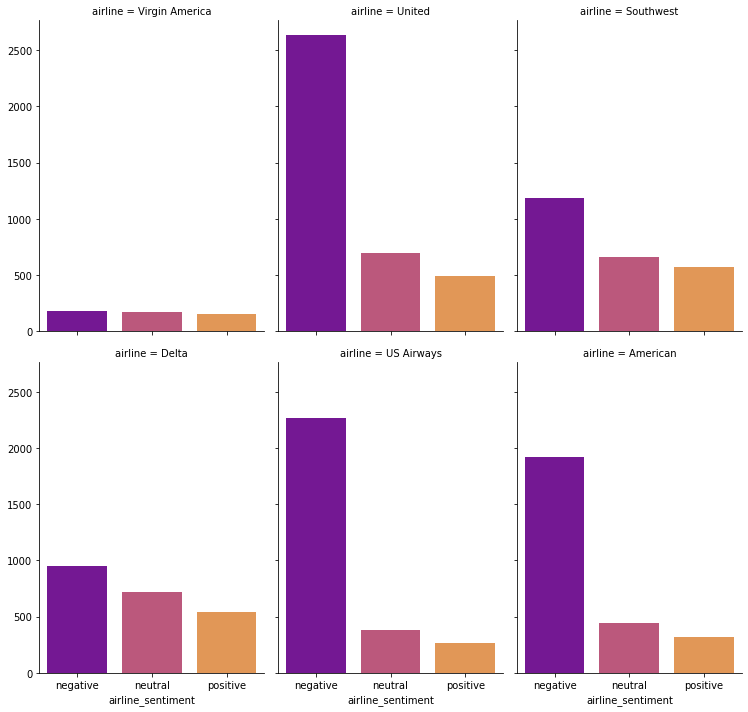

In [36]:
g = sns.FacetGrid(tweet_data, col="airline", col_wrap=3, height=5, aspect =0.7)
g = g.map(sns.countplot, "airline_sentiment",order =tweet_data.airline_sentiment.value_counts().index, palette='plasma')
plt.show()
# Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
# Virgin America has the least number of negative reviews

**Most Common negative review reasons**

Customer Service Issue         2898
Late Flight                    1655
Can't Tell                     1190
Cancelled Flight                839
Lost Luggage                    718
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     479
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


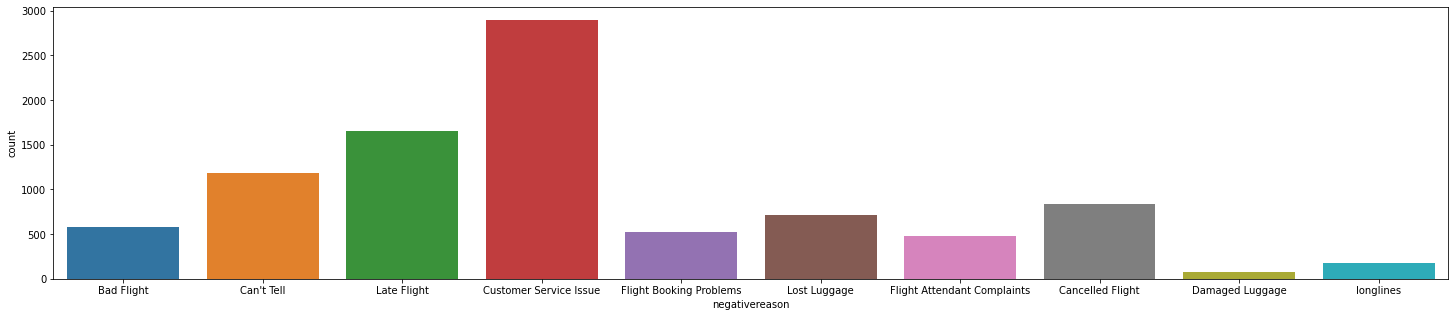

In [37]:
# Check the most common negative reason 
y = tweet_data['negativereason']
print(y.value_counts())
plt.figure(figsize=(25,5)) 
g = sns.countplot(y)
# Customer service and Late flight seems to be the main reason why customers are giving bad feedback

**Summary Part 1**

---



*   There are 14640 rows and 15 columns in the tweet data
*   There are 36 duplicate records in the data set
*   Here we can see that United Airlines, US Airways, American Airlines has the most number of negative review
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight seems to be the main reason why customers are giving bad feedback



# <font color='blue'>Step 2</font>

**Understand of data-columns:**

a. Drop all other columns except “text” and “airline_sentiment”. 

b. Check the shape of data. 

c. Print first 5 rows of data. 

In [44]:
tweet_data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

**Drop Irrelevant columns**

In [45]:
# Let us now remove irrelevant columns
tweet_data_relevant = tweet_data.drop(['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count','tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis =1)

**Shape of Data**

In [46]:
# There are 14568 rows and 2 columns (This is result of keeping relevant rows and duplicate data cleanup)
tweet_data_relevant.shape

(14568, 2)

**Printing first 5 rows of data**

In [47]:
tweet_data_relevant.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [48]:
print(tweet_data_relevant.airline_sentiment.value_counts())

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


**Is the data balanced**

negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


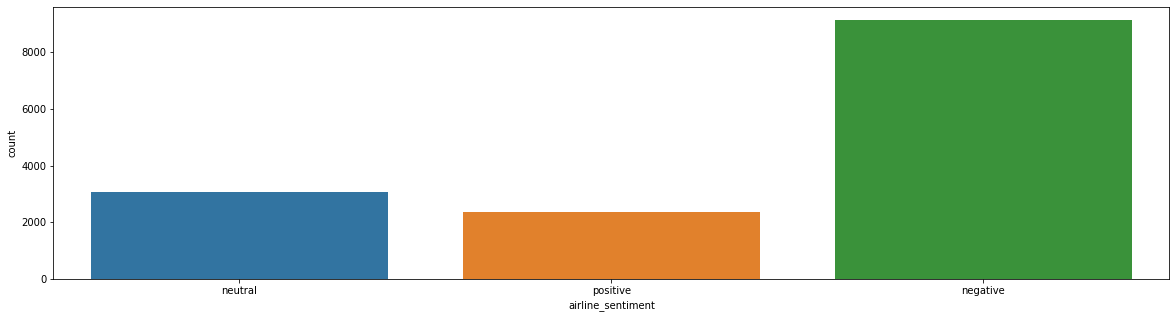

In [49]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Summary Part 2**

*   There data is not balanced, The percentage of negative sentiment is high
*   There are 14568 rows in the dataset after duplicate data cleanup

# <font color='blue'>Step 3</font>

**Text pre-processing: Data preparation. **

*	a. Html tag removal. 
*	b. Tokenization. 
*	c. Remove the numbers. 
*	d. Removal of Special Characters and Punctuations. 
*	e. Conversion to lowercase. 
*	f. Lemmatize or stemming. 
*	g. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the data in text format.) 
*	h. Print first 5 rows of data after pre-processing.

**Html tag removal**

In [64]:
def perform_html_cleanup( raw_review ):
  # 1. Remove HTML
  review_text = BeautifulSoup(raw_review).get_text()
  return review_text

**Replace Contraction**

In [65]:
def replace_contractions(raw_review):
    #Replace contractions in raw_review
    return contractions.fix(raw_review)

**Tokenization**

In [66]:
def perform_tokenization( raw_review ):
  # 2. Perform Tokenization
  word_tokens = word_tokenize(raw_review)  # Tokenization
  return word_tokens

**Removal of Numbers**

In [67]:
def remove_numbers(list_of_words): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

**Remove special characters and punctuations**

In [68]:
def remove_special_character_punctuation(list_of_words): 
    pattern = '[^A-Za-z0-9]+'
    list = [re.sub(pattern, '', i) for i in list_of_words] 
    return list

In [69]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

**Conversion to Lower case**

In [70]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

**Remove empty String**

In [71]:
def remove_empty_string(words):
  return list(filter(None, words))

**Stemming**

In [72]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

**Lemmatization**

In [73]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

**Complete Pre-preocessing**

In [74]:
def perform_cleanup(raw_review):
    clean_review = perform_html_cleanup(raw_review)
    clean_review = replace_contractions(clean_review)
    clean_review = perform_tokenization(clean_review)
    clean_review = remove_numbers(clean_review)
    clean_review = remove_special_character_punctuation(clean_review)
    clean_review = remove_punctuation(clean_review)
    clean_review  = to_lowercase(clean_review)
    clean_review = remove_empty_string(clean_review)
    #clean_review = stem_words(clean_review)
    clean_review = lemmatize_verbs(clean_review)
    return clean_review

In [75]:
print(tweet_data_relevant.head())

  airline_sentiment                                               text
0           neutral                    virginamerica what dhepburn say
1          positive  virginamerica plus you have add commercials to...
2           neutral  virginamerica i do not today must mean i need ...
3          negative  virginamerica it be really aggressive to blast...
4          negative  virginamerica and it be a really big bad thing...


**Join the words in the list to convert back to text string in the dataframe**


(So that each row contains the data in text format.)

In [76]:
clean_reviews = []

for i, row in tweet_data_relevant.iterrows():
    words = tweet_data_relevant.at[i, 'text']
    words = perform_cleanup(words)
    tweet_data_relevant.at[i,'text'] = " ".join( words )
    clean_reviews.append( tweet_data_relevant.at[i, 'text'] )
tweet_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


**Print first 5 rows of data after pre-processing**

In [77]:
tweet_data_relevant.head(5)

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


**bold text**# <font color='blue'>Step 4</font>

**Vectorization: )**


a. Use CountVectorizer.

b. Use TfidfVectorizer

**CountVectorizer**

In [78]:
print ("Creating the bag of words...\n")
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
count_vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
count_vectorizer_data_features = count_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
count_vectorizer_data_features = count_vectorizer_data_features.toarray()

Creating the bag of words...



In [79]:
print (count_vectorizer_data_features.shape)
print(count_vectorizer_data_features)

(14568, 5000)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Vocabulary**

In [80]:
# Take a look at the words in the vocabulary
count_vectorizer_vocab = count_vectorizer.get_feature_names()
print (count_vectorizer_vocab)

['aa', 'aacom', 'aadv', 'aadvantage', 'aafail', 'aal', 'aano', 'aarp', 'abandon', 'abc', 'abcnetwork', 'abilities', 'ability', 'able', 'aboard', 'about', 'above', 'abq', 'abroad', 'absolute', 'absolutely', 'absurd', 'abt', 'abuse', 'abysmal', 'ac', 'accept', 'acceptable', 'access', 'accident', 'accidentally', 'accommodate', 'accommodations', 'accomplish', 'accord', 'accordingly', 'account', 'accountability', 'accrue', 'acct', 'accts', 'accurate', 'accuse', 'achieve', 'acknowledge', 'acknowledgement', 'acknowledgment', 'acquire', 'acquisition', 'across', 'act', 'action', 'activate', 'active', 'activitiesprevention', 'actual', 'actually', 'ad', 'adam', 'add', 'addition', 'additional', 'address', 'addtl', 'adjacent', 'admiral', 'admirals', 'admit', 'adopt', 'adore', 'ads', 'adult', 'advance', 'advantage', 'advertise', 'advice', 'advise', 'advisories', 'advisory', 'aerojobmarket', 'affect', 'affiliate', 'afford', 'affordable', 'afraid', 'after', 'afterall', 'afternoon', 'again', 'against',

**Stop words**

In [81]:
count_vectorizer_stop_words = count_vectorizer.get_stop_words()
print (count_vectorizer_stop_words)
# There are no stop words since we are doing sentiment analysis

None


**Sum up the counts of each vocabulary word**

In [82]:
# Sum up the counts of each vocabulary word
dist = np.sum(count_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(count_vectorizer_vocab, dist):
    print (count, tag)

Streaming output truncated to the last 5000 lines.
274 aa
3 aacom
2 aadv
10 aadvantage
2 aafail
2 aal
2 aano
3 aarp
3 abandon
8 abc
3 abcnetwork
2 abilities
5 ability
119 able
4 aboard
509 about
18 above
9 abq
2 abroad
22 absolute
30 absolutely
13 absurd
7 abt
3 abuse
6 abysmal
9 ac
32 accept
23 acceptable
39 access
5 accident
4 accidentally
26 accommodate
8 accommodations
4 accomplish
11 accord
4 accordingly
80 account
6 accountability
2 accrue
10 acct
2 accts
10 accurate
2 accuse
3 achieve
4 acknowledge
2 acknowledgement
2 acknowledgment
2 acquire
2 acquisition
16 across
18 act
13 action
2 activate
4 active
2 activitiesprevention
21 actual
86 actually
4 ad
2 adam
126 add
4 addition
17 additional
52 address
3 addtl
2 adjacent
5 admiral
12 admirals
6 admit
6 adopt
2 adore
5 ads
2 adult
14 advance
15 advantage
11 advertise
9 advice
20 advise
2 advisories
24 advisory
2 aerojobmarket
15 affect
3 affiliate
13 afford
3 affordable
2 afraid
467 after
2 afterall
30 afternoon
391 again
6 agains

**TfidfVectorizer**

In [83]:
# Initialize the "TfidfVectorizer" object
# Convert a collection of raw documents to a matrix of TF-IDF features.
tfidf_vectorizer = TfidfVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000,
                             min_df=5, 
                             max_df=0.7,
                             ngram_range=(1,2)) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
tfidf_vectorizer_data_features = tfidf_vectorizer.fit_transform(clean_reviews)

# Numpy arrays are easy to work with, so convert the result to an 
# array
tfidf_vectorizer_data_features = tfidf_vectorizer_data_features.toarray()

In [84]:
print (tfidf_vectorizer_data_features.shape)
print(tfidf_vectorizer_data_features)

(14568, 5000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


**Vocabulary**

In [85]:
# Take a look at the words in the vocabulary
tfidf_vectorizer_vocab = tfidf_vectorizer.get_feature_names()
print (tfidf_vectorizer_vocab)

['aa', 'aa be', 'aadvantage', 'able', 'able to', 'about', 'about an', 'about it', 'about my', 'about our', 'about the', 'about this', 'about to', 'about you', 'about your', 'above', 'absolute', 'absolutely', 'absurd', 'accept', 'acceptable', 'access', 'access to', 'accommodate', 'accord', 'accord to', 'account', 'acct', 'accurate', 'across', 'act', 'action', 'actual', 'actually', 'add', 'add my', 'add to', 'additional', 'address', 'admirals', 'admirals club', 'advance', 'advantage', 'advertise', 'advise', 'advisory', 'affect', 'afford', 'after', 'after an', 'after be', 'after hours', 'after land', 'after my', 'after the', 'after wait', 'after you', 'afternoon', 'again', 'again for', 'again you', 'age', 'agent', 'agent at', 'agent be', 'agents', 'agents at', 'agents be', 'ago', 'ago and', 'ago be', 'ah', 'ahead', 'air', 'aircraft', 'airfare', 'airline', 'airline be', 'airline ever', 'airline have', 'airline in', 'airline that', 'airline to', 'airlines', 'airlines be', 'airplane', 'airpo

**Stop Words**

In [86]:
tfidf_vectorizer_stop_words = tfidf_vectorizer.get_stop_words()
print (tfidf_vectorizer_stop_words)

None


**Sum up the counts of each vocabulary word**

In [87]:
# Sum up the counts of each vocabulary word
tf_df_dist = np.sum(tfidf_vectorizer_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(tfidf_vectorizer_vocab, tf_df_dist):
    print (count, tag)

Streaming output truncated to the last 5000 lines.
52.80423618449975 aa
3.4484395695389374 aa be
2.8880481847076425 aadvantage
23.983880367610904 able
22.270881142239208 able to
86.09303872577937 about
3.454542675314009 about an
7.435463139480652 about it
10.440439939429453 about my
3.0735933408692446 about our
14.58938462945891 about the
4.438924506487296 about this
6.1764692708274955 about to
4.027990262437587 about you
5.756224725540621 about your
5.261020542973917 above
6.841799351645003 absolute
9.967301575129378 absolutely
3.7321081736017185 absurd
9.398767634940377 accept
6.285104159885877 acceptable
10.651439981080435 access
5.676955385805977 access to
7.1702972657486 accommodate
3.2539261356324714 accord
3.2539261356324714 accord to
18.662762153351746 account
2.9396878359583862 acct
3.025755174451996 accurate
4.7385914715301345 across
5.411600837163448 act
4.186901650666092 action
5.689822735408591 actual
20.481587463284082 actually
29.31665792682063 add
4.636909912392788 add 

# <font color='blue'>Step 5</font>

**Fit and evaluate model using both type of vectorization. **

**RandomForest Classifier on CountVectorizer**

In [88]:
tweet_data_relevant.head()

,airline_sentiment,text
0,neutral,virginamerica what dhepburn say
1,positive,virginamerica plus you have add commercials to...
2,neutral,virginamerica i do not today must mean i need ...
3,negative,virginamerica it be really aggressive to blast...
4,negative,virginamerica and it be a really big bad thing...


negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


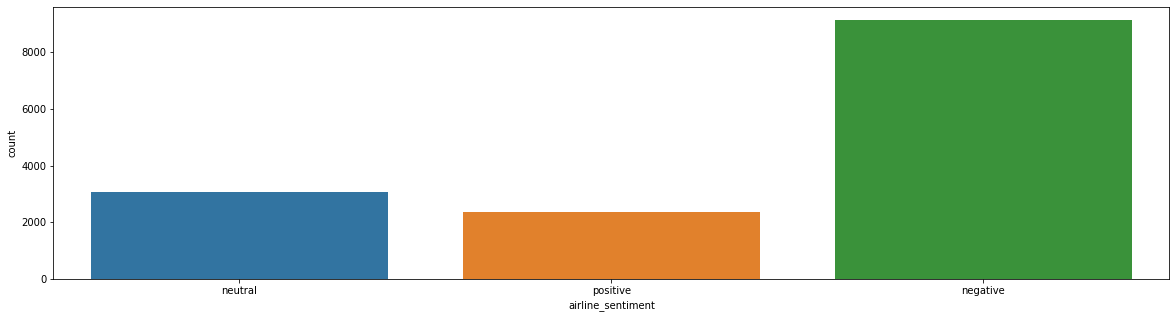

In [89]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Dividing Data to Train and Test**

In [91]:
x = count_vectorizer_data_features     # Predictor feature columns
y = tweet_data_relevant['airline_sentiment']   # Predicted class

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [92]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


**Applying SMOTE since the data is not balanced**

In [93]:
smt = SMOTE(random_state=0)
X_train_SMOTE, y_train_SMOTE = smt.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [94]:
print(X_train_SMOTE.shape)
print(y_train_SMOTE.shape)

(19266, 5000)
(19266,)


In [95]:
y_train_SMOTE

array(['negative', 'negative', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

**Checking if data is balanced after applying SMOTE**

neutral     6422
negative    6422
positive    6422
Name: airline_sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


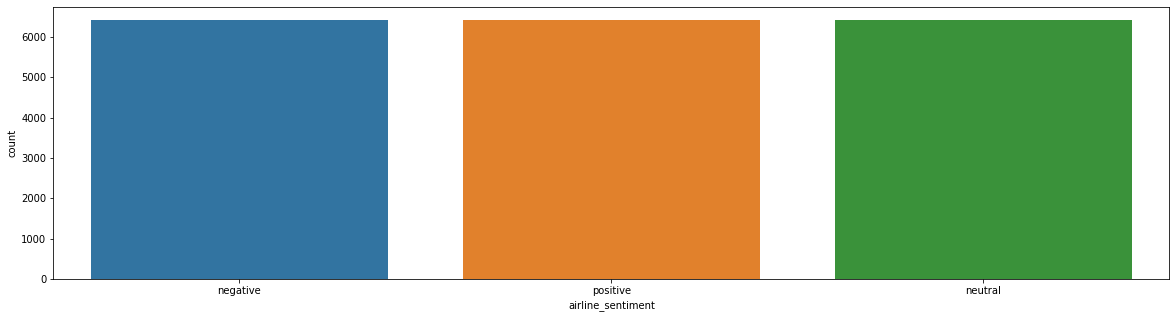

In [96]:
after_smote_airline_sentiment=pd.DataFrame(y_train_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# Here we can see that after applying smote, the data is balanced

**Dividing Test data to Test and Validation Data**

In [97]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)


print(y_validation.shape)
print(y_test_main.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


**Initialize RandomForestClassifier**

In [98]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False) 
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable

print ("Training the random forest...")
randomforestclassifier = randomforestclassifier.fit( X_train_SMOTE, y_train_SMOTE)

Training the random forest...


In [99]:
randomforestclassifier.score(X_train_SMOTE, y_train_SMOTE)

0.9384407764974566

**Evaluate score by cross-validation**

In [100]:
print (np.mean(cross_val_score(randomforestclassifier,X_train_SMOTE, y_train_SMOTE,cv=10)))

0.8019421232192039


In [101]:
# Make class predictions for the Validation set
y_validation_predict= randomforestclassifier.predict(x_validation)

**Training and Validation Accuracy**

In [102]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier.score(x_validation, y_validation))
print()

Trainig accuracy 0.9384407764974566

Validation accuracy 0.7693363844393593



**Classification Report**  (Validation Set)

In [103]:
print(metrics.classification_report(y_validation,y_validation_predict))

              precision    recall  f1-score   support

    negative       0.82      0.90      0.86      1331
     neutral       0.62      0.52      0.57       467
    positive       0.72      0.62      0.67       387

    accuracy                           0.77      2185
   macro avg       0.72      0.68      0.70      2185
weighted avg       0.76      0.77      0.76      2185



**Confusion Matrix** (Validation Set)

<Figure size 432x288 with 0 Axes>

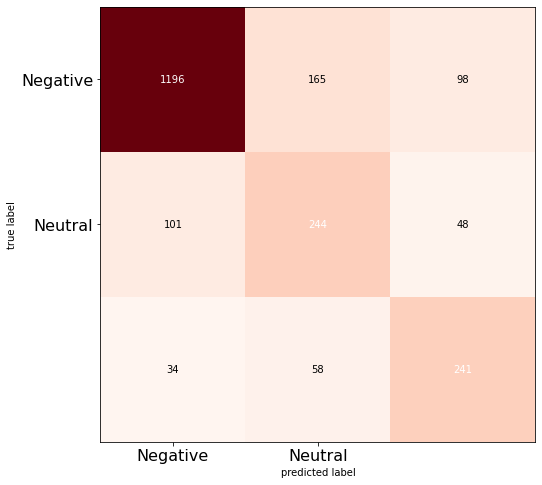

In [104]:
cm=confusion_matrix(y_validation_predict , y_validation)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Testing Data Accuracy**

In [105]:
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

Testing accuracy 0.7557182067703568



**Classification Report**  (Test Set)

In [106]:
# Make class predictions for the Validation set
y_test_predict= randomforestclassifier.predict(x_test_main)

print(metrics.classification_report(y_test_main,y_test_predict))

              precision    recall  f1-score   support

    negative       0.82      0.89      0.85      1387
     neutral       0.61      0.48      0.54       465
    positive       0.62      0.58      0.60       334

    accuracy                           0.76      2186
   macro avg       0.68      0.65      0.66      2186
weighted avg       0.74      0.76      0.75      2186



**Confusion Matrix** (Test Set)

<Figure size 432x288 with 0 Axes>

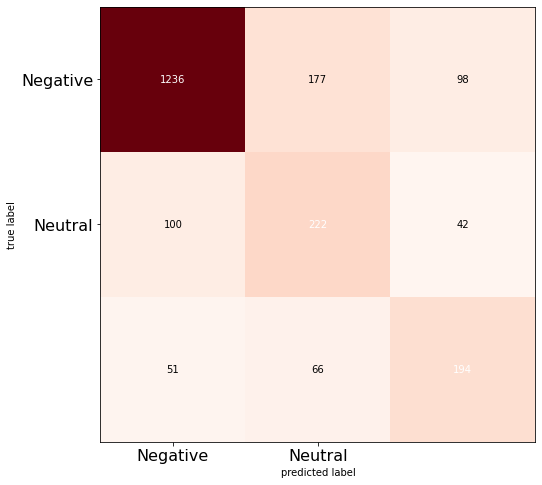

In [107]:
cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Random Forest Classifier on TfidfVectorizer**

**Dividing Data into train and Test**

In [108]:
x_tf_idf = tfidf_vectorizer_data_features     # Predictor feature columns
y_tf_idf = tweet_data_relevant['airline_sentiment']   # Predicted class

x_train_tf_idf, x_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(x_tf_idf, y_tf_idf, test_size=0.3, random_state=1)  # 1 is just any random seed number

In [109]:
print(x_train_tf_idf.shape)
print(y_train_tf_idf.shape)
print(x_test_tf_idf.shape)
print(y_test_tf_idf.shape)

(10197, 5000)
(10197,)
(4371, 5000)
(4371,)


negative    9140
neutral     3083
positive    2345
Name: airline_sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


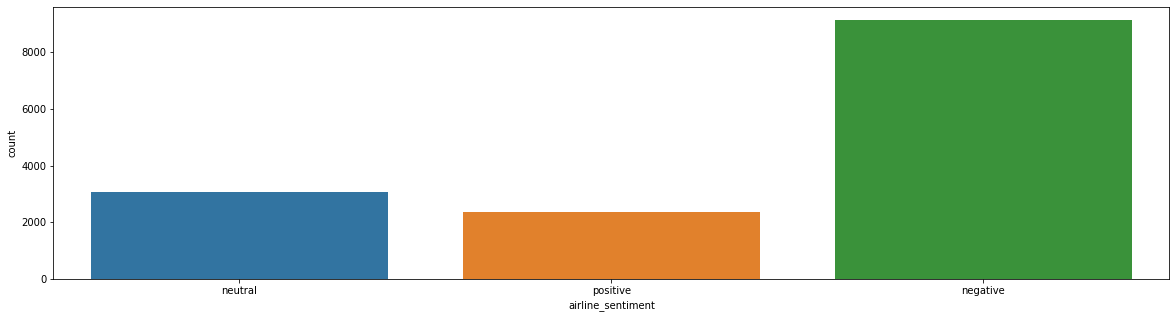

In [110]:
y = tweet_data_relevant['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced, There are lot of negative sentiments

**Applying SMOTE since the data is not balanced**

In [111]:
tf_idf_smt = SMOTE(random_state=0)
X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE = smt.fit_sample(x_train_tf_idf, y_train_tf_idf)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [112]:
print(X_train_tf_idf_SMOTE.shape)
print(y_train_tf_idf_SMOTE.shape)

(19266, 5000)
(19266,)


neutral     6422
negative    6422
positive    6422
Name: airline_sentiment, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


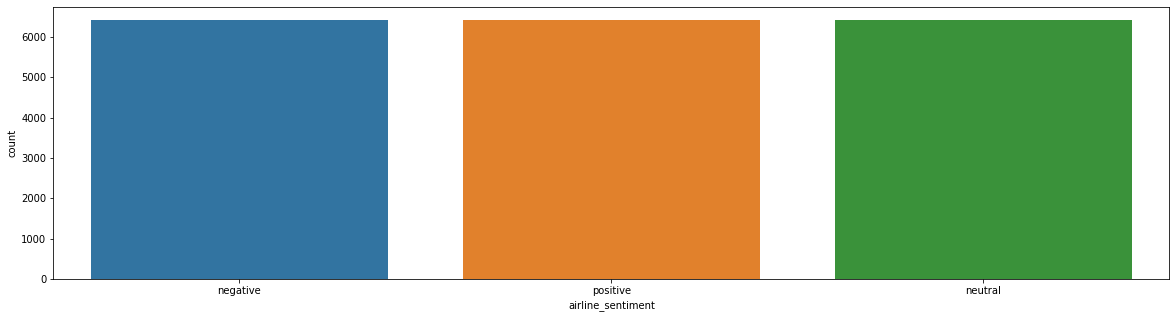

In [113]:
after_smote_airline_sentiment_tf_idf=pd.DataFrame(y_train_tf_idf_SMOTE, columns=['airline_sentiment']) 
y = after_smote_airline_sentiment_tf_idf['airline_sentiment']
print(y.value_counts())
plt.figure(figsize=(20,5))
g = sns.countplot(y)
# Here we can see that after smote , the data is balanced

In [114]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation_tf_idf, x_test_main_tf_idf, y_validation_tf_idf, y_test_main_tf_idf = train_test_split(x_test_tf_idf, y_test_tf_idf, test_size=0.50, random_state=1)

print(x_validation_tf_idf.shape)
print(x_test_main_tf_idf.shape)


print(y_validation_tf_idf.shape)
print(y_test_main_tf_idf.shape)

# There are 2185 samples for validation and 2186 samples for testing

(2185, 5000)
(2186, 5000)
(2185,)
(2186,)


**Initialize RandomForestClassifier**

In [115]:
# Initialize a Random Forest classifier with 100 trees
randomforestclassifier_tf_idf = RandomForestClassifier(verbose=1,n_jobs=-1,n_estimators = 100) 
# Fit the forest to the training set

print ("Training the random forest...")
randomforestclassifier_tf_idf = randomforestclassifier_tf_idf.fit( X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

Training the random forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   42.1s finished


In [116]:
randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.4s finished


0.9977680888612063

**Evaluate score by cross-validation**

In [ ]:
print (np.mean(cross_val_score(randomforestclassifier_tf_idf,X_train_tf_idf_SMOTE, y_train_tf_idf_SMOTE,cv=10)))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]:

In [ ]:
# Make class predictions for the Validation set
y_validation_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_validation_tf_idf)

**Training and Validation Accuracy**

In [ ]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Validation accuracy",randomforestclassifier_tf_idf.score(x_validation_tf_idf, y_validation_tf_idf))
print()

**Classification Report**  (Validation Set)

In [ ]:
print(metrics.classification_report(y_validation_tf_idf,y_validation_predict_tf_idf))

**Confusion Matrix** (Validation Set)

In [ ]:
cm=confusion_matrix(y_validation_predict_tf_idf , y_validation_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Test Accuracy**

In [ ]:
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

**Classification Report**  (Test Set)

In [ ]:
# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

**Confusion Matrix** (Test Set)

In [ ]:
cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

# <font color='blue'>Step 6</font>

**Summarize your understanding of the application of Various Pre-processing and Vectorization and
performance of your model on this dataset.**


**Summary**

---



**Pre-processing steps in NLP**

In [ ]:
# Pre-processing steps in NLP
#      1. HTML tag cleanup
#                          -  It returns all the text in a document or beneath a tag, as a single Unicode string:
#      2. Contraction
#                          - Contractions are shortened version of words or syllables. 
#                          - In case of English contractions are often created by removing one of the vowels from the word. 
#                          - Examples would be, do not to don’t and I would to I’d. Converting each contraction to its expanded, original form helps with text standardization.
#      3. Tokenization
#                          - Tokenization is a step which splits longer strings of text into smaller pieces, or tokens. 
#                          - Larger chunks of text can be tokenized into sentences, sentences can be tokenized into words, etc. 
#                          - Further processing is generally performed after a piece of text has been appropriately tokenized. 
#                          - Tokenization is also referred to as text segmentation or lexical analysis.
#                          - Sometimes segmentation is used to refer to the breakdown of a large chunk of text into pieces larger than words (e.g. paragraphs or sentences), 
#                                        while tokenization is reserved for the breakdown process which results exclusively in words.
#      4. Removing numbers
#                          - Remove numbers from list of tokenized words
#      5. Remove special characters
#                          - Remove special characters from list of tokenized words
#      6. Remove punctuation
#                          - Remove punctuation from list of tokenized words
#      7. Convert text to lower case
#                          - converting all text to the same case 
#      8. Remove empty strings
#                          - Remove empty string from list of tokenized words
#      9. Stemming
#                          - Converting the words into their base word or stem word ( Ex - tastefully, tasty, these words are converted to stem word called 'tasti'). 
#                            This reduces the vector dimension because we dont consider all similar words
#      10.Lemmatization
#                          - Lemmatization, unlike Stemming, reduces the inflected words properly ensuring that the root word belongs to the language. 
#                            In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words.

**Techniques for Encoding**

In [ ]:
# Steps to do after text pre-processing:
#Techniques for Encoding - These are the popular techniques that are used for encoding:

#       o Bag of words         (CountVectorization)
#                              In BoW we construct a dictionary that contains set of all unique words from our text review dataset. 
#                              The frequency of the word is counted here. If there are d unique words in our dictionary then for every sentence or review the vector will be of length d 
#                              and count of word from review is stored at its particular location in vector. The vector will be highly sparse in such case.
#       o Tf-idf               (TfIdfVectorization)  (Term Frequency - Inverse Document Frequency)
#                               Term Frequency - Inverse Document Frequency it makes sure that less importance is given to most frequent words and also considers less frequent words.
#                               Term Frequency is number of times a particular word(W) occurs in a review divided by totall number of words (Wr) in review. The term frequency value ranges from 0 to 1.
#                               Inverse Document Frequency is calculated as log(Total Number of Docs(N) / Number of Docs which contains particular word(n)). Here Docs referred as Reviews.
#                               TF-IDF is TF * IDF that is (W/Wr)*LOG(N/n)

**Performance of Classification Model**

**RandomForestClassifier on CountVectorizer**

In [ ]:
print("Trainig accuracy",randomforestclassifier.score(X_train_SMOTE,y_train_SMOTE))  
print()
print("Testing accuracy",randomforestclassifier.score(x_test_main, y_test_main))
print()

y_test_predict= randomforestclassifier.predict(x_test_main)
print(metrics.classification_report(y_test_main,y_test_predict))

cm=confusion_matrix(y_test_predict , y_test_main)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**RandomForestClassifier on TfidfVectorizer**

In [ ]:
print("Trainig accuracy",randomforestclassifier_tf_idf.score(X_train_tf_idf_SMOTE,y_train_tf_idf_SMOTE))  
print()
print("Test accuracy",randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
print()

# Make class predictions for the test set
y_test_predict_tf_idf= randomforestclassifier_tf_idf.predict(x_test_main_tf_idf)
print(metrics.classification_report(y_test_main_tf_idf,y_test_predict_tf_idf))

cm=confusion_matrix(y_test_predict_tf_idf , y_test_main_tf_idf)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(2), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

In [ ]:
Accuracy=[]
Model=[]
Accuracy.append(randomforestclassifier.score(x_test_main, y_test_main))
Accuracy.append(randomforestclassifier_tf_idf.score(x_test_main_tf_idf, y_test_main_tf_idf))
Model.append("RandomForestClassifier on CountVectorizer")
Model.append("RandomForestClassifier on TfidfVectorizer")


index=[0,1]
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=45)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

xlocs, xlabs = plt.xticks()

for i, v in enumerate(Accuracy):
    plt.text(xlocs[i] - 0.25, v + 0.01, str(v))

# The RandomForestClassfier on TfidfVectorizer is having better accuracy

**Summary**

---





*   RandomForestClassifier on TfidfVectorizer has an accuracy of 77% whereas 
RandomForestClassifier on CountVectorizer has an accuracy of 75%. This shows that the model using TfidfVectorizer is better.
*   Model is able to predict airline sentiment correctly 77% of the time
*   United Airlines, US Airways, American Airlines has the most number of negative review
*   Virgin America has the least number of negative reviews
*   Customer service and Late flight seems to be the main reason why customers are giving bad feedback


